<a href="https://colab.research.google.com/github/Sai0210/homework2/blob/main/Question_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Confusion Matrix ---
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


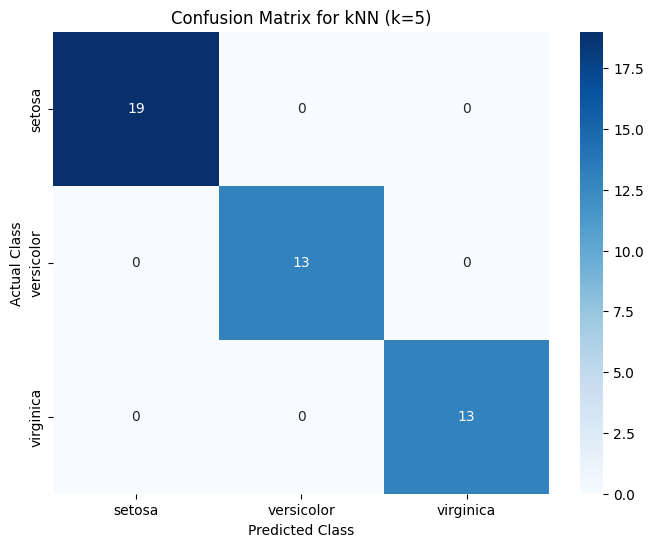


--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



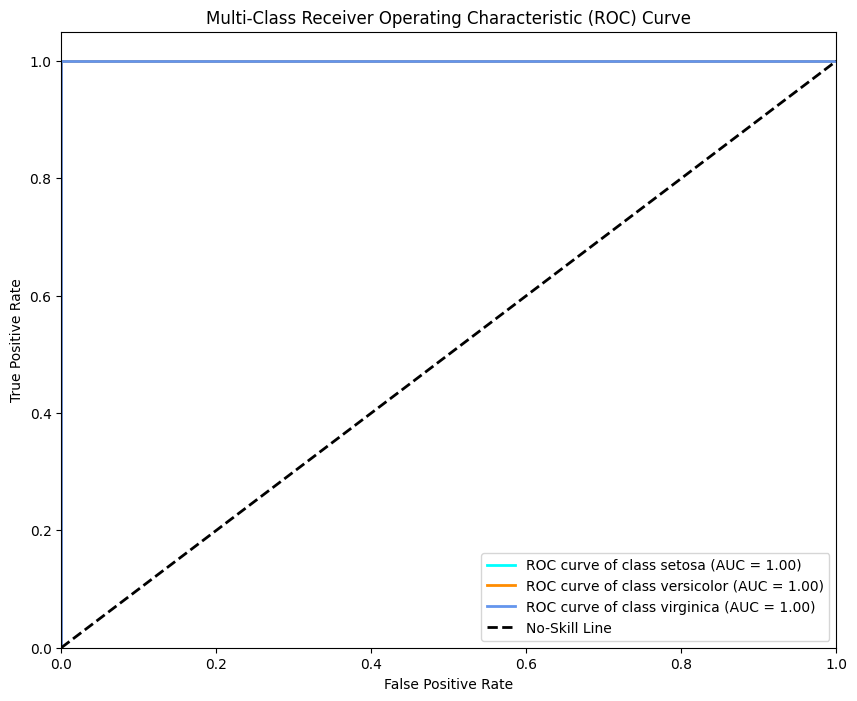


--- AUC Scores ---
AUC for setosa: 1.0000
AUC for versicolor: 1.0000
AUC for virginica: 1.0000


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# --- 1. Load and Prepare Data ---
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
n_classes = len(class_names)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 2. Train the kNN Classifier ---
# Initialize and train the classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)
# Get probability scores for ROC curve calculation
y_score = knn.predict_proba(X_test)

# --- 3. Compute and Display Confusion Matrix ---
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plotting the confusion matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for kNN (k=5)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()


# --- 4. Compute and Display Classification Report ---
print("\n--- Classification Report ---")
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)


# --- 5. Plot ROC Curve and Compute AUC ---
# Binarize the output labels for multi-class ROC analysis
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Plot the "no-skill" line (random guessing)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='No-Skill Line')

# Final plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("\n--- AUC Scores ---")
for i in range(n_classes):
    print(f"AUC for {class_names[i]}: {roc_auc[i]:.4f}")